In [3]:
import pandas as pd
df = pd.read_csv("cancer.csv", sep = ';')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,type,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,Normal,0
1,20.57,17.77,132.90,1326.0,0.08474,Normal,0
2,19.69,21.25,130.00,1203.0,0.10960,Normal,0
3,11.42,20.38,77.58,386.1,0.14250,Normal,0
4,20.29,14.34,135.10,1297.0,0.10030,Normal,0


In [4]:
df.shape

(569, 7)

In [5]:
df.isnull().any()

mean_radius        False
mean_texture       False
mean_perimeter     False
mean_area          False
mean_smoothness    False
type               False
diagnosis          False
dtype: bool

In [7]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   type             569 non-null    object 
 6   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 31.2+ KB


In [9]:
df.drop("diagnosis",1,inplace=True)

In [10]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,type
0,17.99,10.38,122.80,1001.0,0.11840,Normal
1,20.57,17.77,132.90,1326.0,0.08474,Normal
2,19.69,21.25,130.00,1203.0,0.10960,Normal
3,11.42,20.38,77.58,386.1,0.14250,Normal
4,20.29,14.34,135.10,1297.0,0.10030,Normal


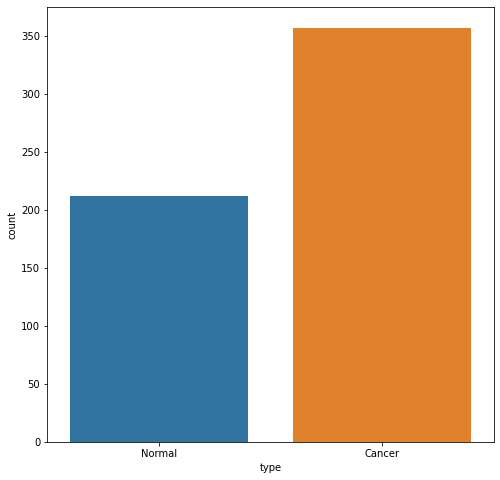

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.countplot(df['type'])

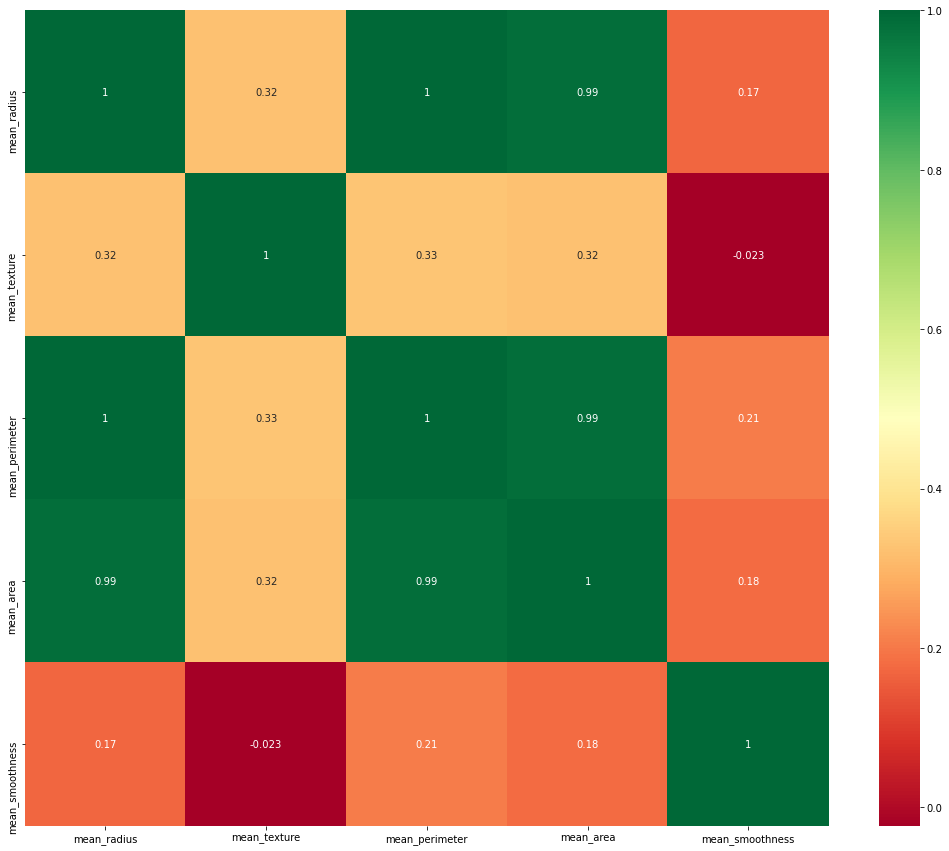

In [12]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')

In [14]:
#Libraries untuk machine learning
from sklearn.ensemble import RandomForestClassifier
X = df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness']]
y = df['type']

In [15]:
#Membagi data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
#Metode yang digunakan adalah Random Forest Classifier
model = RandomForestClassifier(n_estimators = 1000, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [17]:
#Akurasi dari data training
model.score(X_train, y_train)

1.0

In [18]:
#Menguji data dengan menggunakan data testing
y_predict = model.predict(X_test)

In [19]:
#Mengetahui akurasi dari data testing dan data prediksi
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

      Cancer       0.89      0.97      0.93        72
      Normal       0.94      0.79      0.86        42

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114



[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Cancer')]

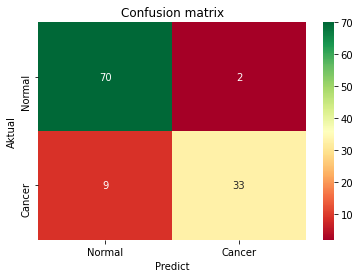

In [20]:
#Menggunakan konfusion matriks untuk mengetahui false positif dan false negative dari data Testing
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_predict)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap = 'RdYlGn')

ax.set_xlabel("Predict")
ax.set_ylabel("Aktual")
ax.set_title("Confusion matrix")
ax.xaxis.set_ticklabels(["Normal", "Cancer"])
ax.yaxis.set_ticklabels(["Normal", "Cancer"])

In [21]:
#Menyimpan model machine learning
import pickle
model_name  = 'model_cancer.pkl'
pickle.dump(model, open(model_name, 'wb'))
print("[INFO]: Model telah tersimpan ...")

[INFO]: Model telah tersimpan ...


In [24]:
#Test model
input_data = pickle.load(open(model_name, 'rb'))
mean_radius = float (input("mean_radius: "))
mean_texture = float(input("mean_texture: "))
mean_perimeter = float(input("mean_perimeter: "))
mean_area = float(input("mean_area: "))
mean_smoothness = float(input("mean_smoothness: "))

result = model.predict([[mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness]])[0]
print("Output: ", result)



mean_radius: 13.84
mean_texture: 14.36
mean_perimeter: 87.46
mean_area: 566.3
mean_smoothness: 0.09773
Output:  Cancer
